Skat is an unbelievably difficult game to develop a winning algorithm for. This is for three main reasons:

    1. The game, like many card games, has a massive number of possible combinations of player cards to account for. This makes it very computationally taxing to implement a tree based search algorithm and/or a Bayesian hand prediction model. 
    2. The existence of the 'skat,' the pile of two face-down cards that the player who wins the rights to play the game, receives at the beginning of the game, and the subsequent card selection process, is extremely difficult to optimize for and model.
    3. Finally, and most importantly, the actual bidding process to receive the rights to play the game is very difficult to model and optimize for, especially with a tree based algorithm.

Nevertheless, I believe the structure of the game is very interesting and instructive, and I will be trying to implement a tree based search model to solve Skat. To do this, I first want to remove the difficult issues associated with creating an optimal Skat bot and instead solve a simpler sub-problem of my very own creation: Micro-Skat! 

In Micro-Skat, each player will receive 4 cards instead of the usual 10. Additionally, there will be no skat in the middle that the player who plays the game gets access to. Finally, the player who plays the game will be pre-determined, so there will be no bidding process. This really trivializes the game and makes it extremely simple, but I believe solving this micro-problem could be helpful in approaching the larger game as a whole, especially because there are a number of card selection algorithms that others have come up with that could be integrated with my model. Like in the original game, the team with the majority of the points at the end of the game will win. Finally, variations like Schneider, Grang, and Null will be disregarded for now. 

Here, we will compare two variations of Micro-Skat and run Monte Carlo simulations to get a sense of the distribution of cards in each variation to determine which variation will be more suitable for us. This will not be a rigorous analysis, and the balance of the game doesn't actually matter a ton here, but it would be nice to choose a game that is at least in the ballpark of balanced. We outline two variations here:

    1. Two suite Micro-Skat: The 7 and 8s are removed. There are two suits: red and black.
    2. Three suite Micro-Skat: The 7, 8, Q, and 10s are removed. There are three suits: red, black, and gold.

In both instances, there will be 12 total cards in the deck, so the basic gameplay patterns will be the same. However, both games will be very different from the original both in terms of the proportion of trumps to non-trumps and in the proportion of jacks to overall cards, both of which should significantly impact overall play. 

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def derive_hand_stats(hand):
    suit_prevalence = {'r' : 0, 'b' : 0, 'g' : 0}
    num_jacks = 0
    for card in hand:
        if card[0] == 'J':
            num_jacks += 1
        else:
            suit_prevalence[card[1]] += 1
    return max(suit_prevalence.values()), max(suit_prevalence.values()) + num_jacks

def deal_cards():
    hands = CARDS
    random.shuffle(hands)

    hand_lst = [hands[x:x+4] for x in range(0, len(hands), 4)]

    max_trumps = []
    max_suits = []
    for hand in hand_lst:
        max_suit, num_trumps = derive_hand_stats(hand)
        max_trumps = []
        max_trumps.append(num_trumps)
        max_suits.append(max_suit)
    return max_trumps, max_suits

def monte_carlo(iterations):
    max_trumps_arr = []
    num_max_suit_arr = []
    for _ in range(iterations):
        max_trumps, num_max_suits = deal_cards()
        max_trumps_arr += max_trumps
        num_max_suit_arr += num_max_suits
    return max_trumps_arr, num_max_suit_arr


2 Suite Variation of Micro-Skat

In [4]:
CARDS = [('9', 'r'), ('10', 'r'), ('J', 'r'), ('Q', 'r'), ('K', 'r'), ('A', 'r'),
         ('9', 'b'), ('10', 'b'), ('J', 'b'), ('Q', 'b'), ('K', 'b'), ('A', 'b')]

In [5]:
max_trumps_arr, num_max_suit_arr = monte_carlo(100000)

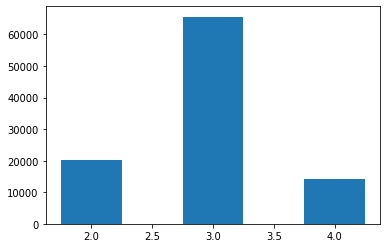

In [6]:
data = range(11)
data = np.array(max_trumps_arr)

d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2
plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.5)
plt.show()

In [7]:
print('Average max number of trumps', np.mean(max_trumps_arr))

Average max number of trumps 2.93908


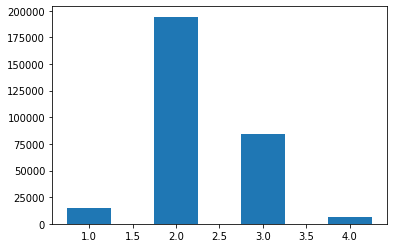

In [8]:
data2 = range(11)
data2 = np.array(num_max_suit_arr)

d2 = np.diff(np.unique(data2)).min()
left_of_first_bin2 = data2.min() - float(d2)/2
right_of_last_bin2 = data2.max() + float(d2)/2
plt.hist(data2, np.arange(left_of_first_bin2, right_of_last_bin2 + d2, d2), rwidth=0.5)
plt.show()

In [9]:
average_max_suit = np.mean(num_max_suit_arr)
print('Average max suite size', average_max_suit)

Average max suite size 2.270636666666667


3 Suite Variation of Micro-Skat

In [10]:
CARDS = [('9', 'r'), ('J', 'r'), ('K', 'r'), ('A', 'r'),
         ('9', 'b'), ('J', 'b'), ('K', 'b'), ('A', 'b'),
         ('9', 'g'), ('J', 'g'), ('K', 'g'), ('A', 'g')]

In [11]:
max_trumps_arr, num_max_suit_arr = monte_carlo(100000)

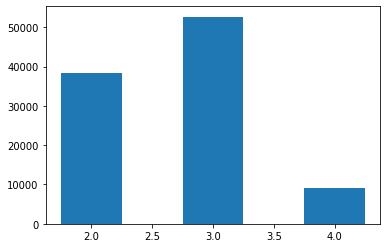

In [12]:
data = range(11)
data = np.array(max_trumps_arr)

d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2
plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.5)
plt.show()

In [13]:
print('Average max number of trumps', np.mean(max_trumps_arr))

Average max number of trumps 2.70877


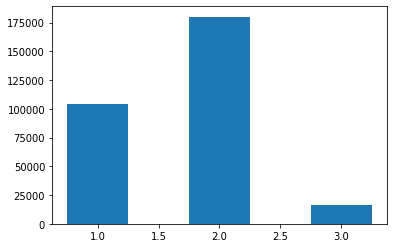

In [14]:
data2 = range(11)
data2 = np.array(num_max_suit_arr)

d2 = np.diff(np.unique(data2)).min()
left_of_first_bin2 = data2.min() - float(d2)/2
right_of_last_bin2 = data2.max() + float(d2)/2
plt.hist(data2, np.arange(left_of_first_bin2, right_of_last_bin2 + d2, d2), rwidth=0.5)
plt.show()

In [15]:
average_max_suit = np.mean(num_max_suit_arr) + 2/3
print('Average max suite size', average_max_suit)

Average max suite size 2.3747533333333335


Overall, I believe the play patterns of 2 suite Micro-Skat will be both more similar to the original game and better balanced because of the proportion of trumps each player will have access to. The overall cards in each suit are also more familiar to me than in the 3 suite variation. Therefore, we will continue by looking at the 2 suit variation. 